# Proyecto #1 - Inteligencia de Negocios

## Integrantes:

### Santiago Cabra Chavez - 202110929 - s.cabrac@uniandes.edu.co
### Andres Cardenas Layton - 202122083 - a.cardenasl@uniandes.edu.co
### Tatiana Vera Hernandez - 202113341 - k.verah@uniandes.edu.co

# Etapa #1 -  Documentación del proceso de aprendizaje automático. 

Para la etapa #1 se adjunto la tabla de ML en la Wiki del repositorio donde se encuentra este archivo .ipynb subido. Link Wiki: https://github.com/scabrac24/ISIS-3301-Inteligencia-de-Negocios---Proyecto_1/wiki

# Etapa #2 - Entendimiento y preparación de los datos.

In [1]:
pip install nltk openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys 
!{sys.executable} -m pip install scikit-learn

In [ ]:
from pathlib import Path
import os, zipfile

p = Path("Datos_proyecto.xlsx")   # ajusta si está dentro de data/: Path("data/Datos_proyecto.xlsx")

print("Existe?:", p.exists())
if p.exists():
    print("Ruta absoluta:", p.resolve())
    print("Tamaño (KB):", round(os.path.getsize(p)/1024, 2))
    print(".xlsx válido (zip)?:", zipfile.is_zipfile(p))

In [ ]:
import sys
!{sys.executable} -m pip install pandas openpyxl

In [24]:
import pandas as pd

df = pd.read_excel("Datos_proyecto.xlsx", engine="openpyxl")
print("Shape:", df.shape)
print(df.head())


Shape: (2424, 2)
                                              textos  labels
0  "Aprendizaje" y "educación" se consideran sinó...       4
1  Para los niños más pequeños (bebés y niños peq...       4
2  Además, la formación de especialistas en medic...       3
3  En los países de la OCDE se tiende a pasar de ...       4
4  Este grupo se centró en las personas que padec...       3


Dataset cargado: (2424, 2)
Columnas: ['textos', 'labels']

Primeras filas:
                                              textos  labels
0  "Aprendizaje" y "educación" se consideran sinó...       4
1  Para los niños más pequeños (bebés y niños peq...       4
2  Además, la formación de especialistas en medic...       3
3  En los países de la OCDE se tiende a pasar de ...       4
4  Este grupo se centró en las personas que padec...       3

Total de textos: 2424
Clases únicas: [4 3 1]
Distribución de clases:
labels
4    1025
3     894
1     505
Name: count, dtype: int64

ANÁLISIS DE CALIDAD DE DATOS

1. VALORES FALTANTES:
Textos faltantes: 0 (0.0%)
Labels faltantes: 0 (0.0%)

2. DUPLICADOS:
Filas completamente duplicadas: 0
Textos duplicados: 0 (0.0%)
Textos vacíos o solo espacios: 0

3. ESTADÍSTICAS DE LONGITUD:
Longitud promedio (caracteres): 683.2
Longitud promedio (palabras): 107.9
Texto más corto: 303 caracteres
Texto más largo: 1492 caracteres
Textos muy cortos (< 3 palabras): 0 (0.

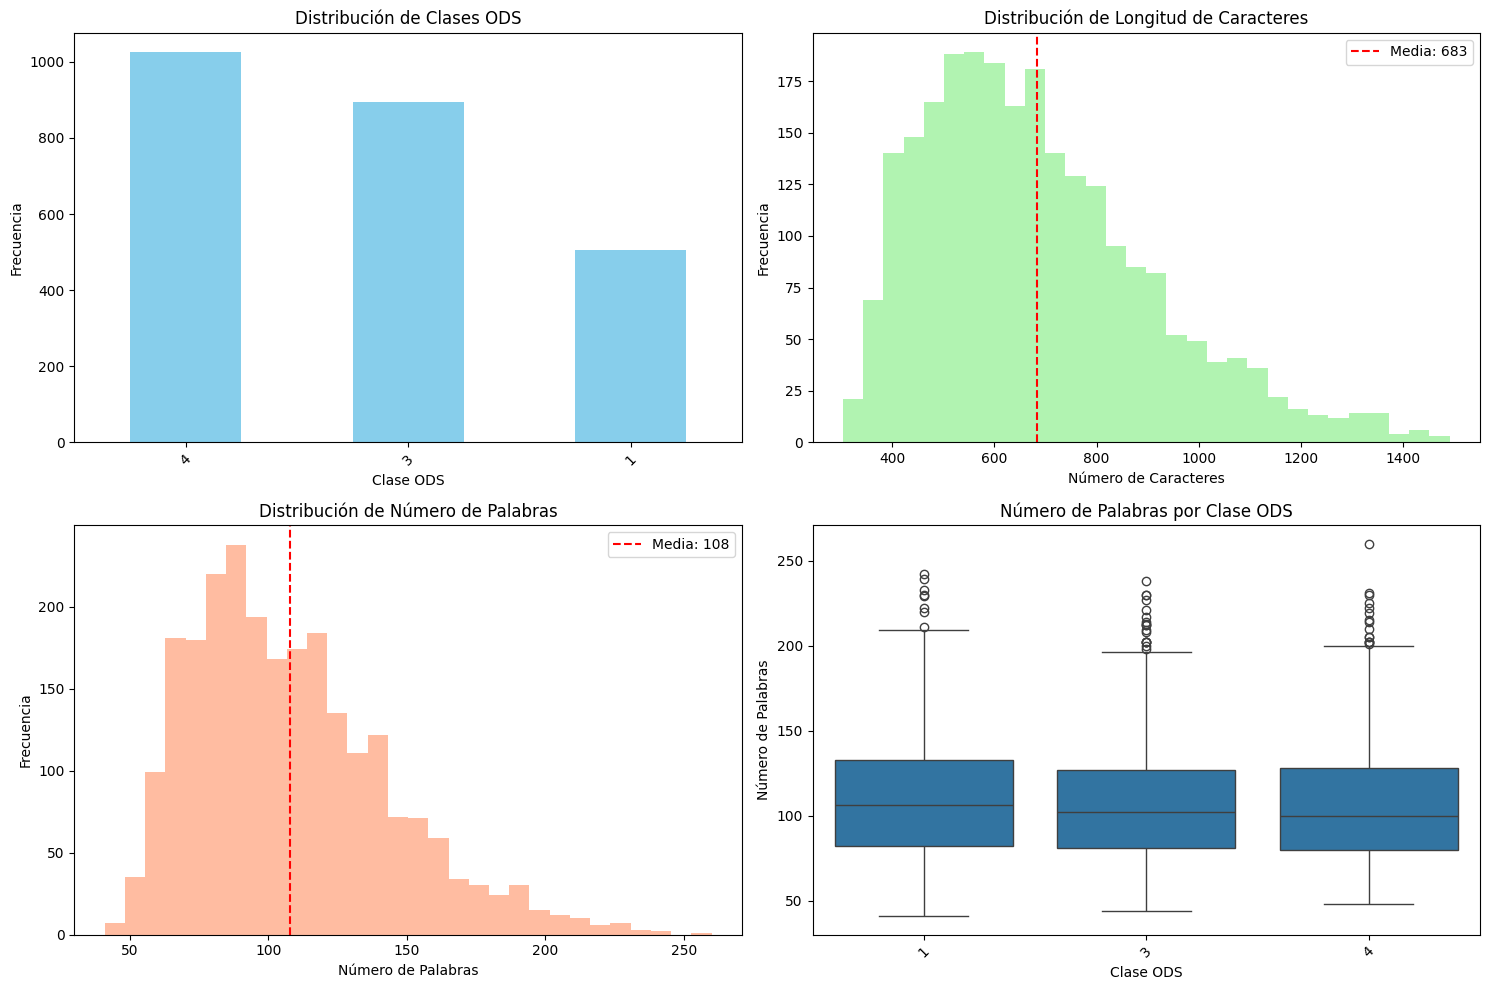


Preprocesamiento completado
Ejemplo de texto original: "Aprendizaje" y "educación" se consideran sinónimos de escolarización formal. Las organizaciones aux...
Ejemplo de texto limpio: aprendizaje y educación se consideran sinónimos de escolarización formal las organizaciones auxiliar...

LIMPIEZA DE DATOS
Dataset original: 2424 registros
Dataset limpio: 2424 registros
Registros eliminados: 0 (0.0%)

Nueva distribución de clases:
Clase 4: 1025 registros (42.3%)
Clase 3: 894 registros (36.9%)
Clase 1: 505 registros (20.8%)

ANÁLISIS DE CONTENIDO

Palabras más comunes (top 15):
los: 8551
que: 5043
las: 4651
para: 3491
del: 2754
por: 2237
con: 2151

Palabras más comunes por clase ODS:

Clase 1:
  los: 1714

Clase 3:
  los: 2985

Clase 4:
  los: 3852

RESUMEN DEL ANÁLISIS
DATASET FINAL PREPARADO:
Total de registros: 2,424
Número de clases: 3
Longitud promedio de texto: 660.3 caracteres
Número promedio de palabras: 105.4

PROBLEMAS IDENTIFICADOS Y SOLUCIONADOS:

ESTADO DEL BALANCE DE CLASES

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings('ignore')

# ==========================================
# CARGA Y CONFIGURACIÓN INICIAL
# ==========================================


# Descargar stopwords 
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Cargar stopwords en español
stop_words_spanish = stopwords.words("spanish")

# Cargar dataset
df = pd.read_excel("/Users/k.verah/ISIS-3301-Inteligencia-de-Negocios---Proyecto_1-1/Datos_proyecto.xlsx")
print(f"Dataset cargado: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")
print("\nPrimeras filas:")
print(df.head())

# Variables de entrada y salida
X = df["textos"]
y = df["labels"]

print(f"\nTotal de textos: {len(X)}")
print(f"Clases únicas: {y.unique()}")
print(f"Distribución de clases:")
print(y.value_counts())

# ==========================================
# ANÁLISIS DE CALIDAD DE DATOS
# ==========================================

print("\n" + "="*50)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("="*50)

# 1. Análisis de valores faltantes
print("\n1. VALORES FALTANTES:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
print(f"Textos faltantes: {missing_data['textos']} ({missing_percent['textos']:.1f}%)")
print(f"Labels faltantes: {missing_data['labels']} ({missing_percent['labels']:.1f}%)")

# 2. Análisis de duplicados
print("\n2. DUPLICADOS:")
total_duplicates = df.duplicated().sum()
text_duplicates = df['textos'].duplicated().sum()
print(f"Filas completamente duplicadas: {total_duplicates}")
print(f"Textos duplicados: {text_duplicates} ({text_duplicates/len(df)*100:.1f}%)")

# 3. Análisis de textos vacíos
empty_texts = df['textos'].isna() | (df['textos'].str.strip() == '')
print(f"Textos vacíos o solo espacios: {empty_texts.sum()}")

# 4. Estadísticas de longitud de texto
print("\n3. ESTADÍSTICAS DE LONGITUD:")
char_lengths = df['textos'].astype(str).str.len()
word_lengths = df['textos'].astype(str).str.split().str.len()

print(f"Longitud promedio (caracteres): {char_lengths.mean():.1f}")
print(f"Longitud promedio (palabras): {word_lengths.mean():.1f}")
print(f"Texto más corto: {char_lengths.min()} caracteres")
print(f"Texto más largo: {char_lengths.max()} caracteres")

# Textos muy cortos
very_short = word_lengths < 3
print(f"Textos muy cortos (< 3 palabras): {very_short.sum()} ({very_short.sum()/len(df)*100:.1f}%)")

# ==========================================
# ANÁLISIS DE DISTRIBUCIÓN DE CLASES
# ==========================================

print("\n4. ANÁLISIS DE BALANCE DE CLASES:")
label_counts = y.value_counts()
label_percent = (label_counts / len(y)) * 100

# Mostrar distribución
for label, count in label_counts.items():
    percentage = label_percent[label]
    print(f"Clase {label}: {count} registros ({percentage:.1f}%)")

# Evaluar balance
max_percent = label_percent.max()
min_percent = label_percent.min()
balance_ratio = max_percent / min_percent

print(f"\nRatio de desbalance: {balance_ratio:.2f}:1")

if balance_ratio <= 2:
    balance_status = "Balanceado"
elif balance_ratio <= 4:
    balance_status = "Moderadamente desbalanceado"
else:
    balance_status = "Altamente desbalanceado"

print(f"Estado: {balance_status}")

# ==========================================
# VISUALIZACIONES
# ==========================================

# Configurar visualizaciones
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribución de clases
label_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribución de Clases ODS')
ax1.set_xlabel('Clase ODS')
ax1.set_ylabel('Frecuencia')
ax1.tick_params(axis='x', rotation=45)

# 2. Distribución de longitud de caracteres
ax2.hist(char_lengths, bins=30, alpha=0.7, color='lightgreen')
ax2.axvline(char_lengths.mean(), color='red', linestyle='--', label=f'Media: {char_lengths.mean():.0f}')
ax2.set_title('Distribución de Longitud de Caracteres')
ax2.set_xlabel('Número de Caracteres')
ax2.set_ylabel('Frecuencia')
ax2.legend()

# 3. Distribución de número de palabras
ax3.hist(word_lengths, bins=30, alpha=0.7, color='lightsalmon')
ax3.axvline(word_lengths.mean(), color='red', linestyle='--', label=f'Media: {word_lengths.mean():.0f}')
ax3.set_title('Distribución de Número de Palabras')
ax3.set_xlabel('Número de Palabras')
ax3.set_ylabel('Frecuencia')
ax3.legend()

# 4. Longitud por clase
df_viz = df.copy()
df_viz['word_count'] = word_lengths
sns.boxplot(data=df_viz, x='labels', y='word_count', ax=ax4)
ax4.set_title('Número de Palabras por Clase ODS')
ax4.set_xlabel('Clase ODS')
ax4.set_ylabel('Número de Palabras')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ==========================================
# FUNCIÓN DE PREPROCESAMIENTO
# ==========================================

def preprocess_text(text):
    """Función para limpiar y preprocesar el texto"""
    if pd.isna(text):
        return ""
    # Convertir a minúsculas
    text = str(text).lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-záéíóúñü\s]', '', text)
    # Eliminar espacios extra
    text = ' '.join(text.split())
    return text

# Preprocesar los textos
X_clean = X.apply(preprocess_text)

print("\nPreprocesamiento completado")
print(f"Ejemplo de texto original: {X.iloc[0][:100]}...")
print(f"Ejemplo de texto limpio: {X_clean.iloc[0][:100]}...")

# ==========================================
# LIMPIEZA DE DATOS
# ==========================================

print("\n" + "="*50)
print("LIMPIEZA DE DATOS")
print("="*50)

# Crear copia para limpieza
df_clean = df.copy()
print(f"Dataset original: {df_clean.shape[0]} registros")

# 1. Eliminar filas con textos vacíos
if empty_texts.sum() > 0:
    df_clean = df_clean[~empty_texts]
    print(f"Eliminados {empty_texts.sum()} textos vacíos")

# 2. Eliminar duplicados
if text_duplicates > 0:
    initial_count = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=['textos'], keep='first')
    removed = initial_count - len(df_clean)
    print(f"Eliminados {removed} textos duplicados")

# 3. Eliminar textos muy cortos
df_clean['word_count'] = df_clean['textos'].astype(str).str.split().str.len()
short_texts = df_clean['word_count'] < 3
if short_texts.sum() > 0:
    df_clean = df_clean[~short_texts]
    print(f"Eliminados {short_texts.sum()} textos muy cortos")

print(f"Dataset limpio: {df_clean.shape[0]} registros")
print(f"Registros eliminados: {df.shape[0] - df_clean.shape[0]} ({((df.shape[0] - df_clean.shape[0])/df.shape[0]*100):.1f}%)")

# Verificar nueva distribución
print(f"\nNueva distribución de clases:")
new_distribution = df_clean['labels'].value_counts()
for label, count in new_distribution.items():
    percentage = (count / len(df_clean)) * 100
    print(f"Clase {label}: {count} registros ({percentage:.1f}%)")

# ==========================================
# ANÁLISIS DE CONTENIDO TEXTUAL
# ==========================================

print("\n" + "="*50)
print("ANÁLISIS DE CONTENIDO")
print("="*50)

# Aplicar preprocesamiento al dataset limpio
df_clean['textos_clean'] = df_clean['textos'].apply(preprocess_text)

# Palabras más comunes en general
print("\nPalabras más comunes (top 15):")
all_words = ' '.join(df_clean['textos_clean']).split()
word_counts = Counter(all_words)
most_common = word_counts.most_common(15)

for word, count in most_common:
    if len(word) > 2:  # Filtrar palabras muy cortas
        print(f"{word}: {count}")

# Palabras más comunes por clase (top 5 por clase)
print(f"\nPalabras más comunes por clase ODS:")
for label in sorted(df_clean['labels'].unique()):
    class_texts = df_clean[df_clean['labels'] == label]['textos_clean']
    class_words = ' '.join(class_texts).split()
    class_word_counts = Counter(class_words)
    class_common = class_word_counts.most_common(5)
    
    print(f"\nClase {label}:")
    for word, count in class_common:
        if len(word) > 2:
            print(f"  {word}: {count}")

# ==========================================
# RESUMEN FINAL
# ==========================================

print("\n" + "="*50)
print("RESUMEN DEL ANÁLISIS")
print("="*50)

print(f"DATASET FINAL PREPARADO:")
print(f"Total de registros: {len(df_clean):,}")
print(f"Número de clases: {len(df_clean['labels'].unique())}")
print(f"Longitud promedio de texto: {df_clean['textos_clean'].str.len().mean():.1f} caracteres")
print(f"Número promedio de palabras: {df_clean['textos_clean'].str.split().str.len().mean():.1f}")

print(f"\nPROBLEMAS IDENTIFICADOS Y SOLUCIONADOS:")
if empty_texts.sum() > 0:
    print(f"- Textos vacíos eliminados: {empty_texts.sum()}")
if text_duplicates > 0:
    print(f"- Textos duplicados eliminados: {text_duplicates}")
if very_short.sum() > 0:
    print(f"- Textos muy cortos eliminados: {very_short.sum()}")

print(f"\nESTADO DEL BALANCE DE CLASES: {balance_status}")
print(f"Ratio de desbalance: {balance_ratio:.2f}:1")

print(f"\nDATASET LISTO PARA:")
print("- Vectorización (CountVectorizer)")
print("- Entrenamiento de modelos (k-NN, Random Forest, SVM)")
print("- Validación cruzada estratificada")

# Variables finales para usar en el modelado
X_final = df_clean['textos_clean']
y_final = df_clean['labels']

print(f"\nVariables preparadas:")
print(f"X_final: {len(X_final)} textos preprocesados")
print(f"y_final: {len(y_final)} etiquetas correspondientes")

# Etapa #3 - Modelado y Evaluacion.

In [49]:

print("\nDESCRIPCIÓN DE ALGORITMOS SELECCIONADOS:")
print("\n1. k-NN (k-Nearest Neighbors):")
print("   - Algoritmo de clasificación basado en proximidad")
print("   - Clasifica según las k muestras más cercanas")
print("   - Usa distancia coseno para datos textuales")
print("   - Trabajado por: Santiago Cabra Chavez")

print("\n2. Random Forest:")
print("   - Conjunto de múltiples árboles de decisión")
print("   - Reduce overfitting mediante bagging")
print("   - Maneja bien la alta dimensionalidad de textos")
print("   - Trabajado por:  Tatiana Vera")

print("\n3. Support Vector Machine (SVM):")
print("   - Encuentra el hiperplano óptimo de separación")
print("   - Efectivo para espacios de alta dimensionalidad")
print("   - Kernel lineal para datos textuales dispersos")
print("   - Trabajado por: Andres Cardenas")

# ==========================================
# Estrategia Única - Bag of Words
# ==========================================
print("\n" + "="*50)
print("ESTRATEGIA DE VECTORIZACIÓN: BAG OF WORDS")
print("="*50)
print("Descripción: Representación binaria de presencia/ausencia de términos")
print("- Ignora la frecuencia, solo considera presencia de términos")
print("- Reduce el impacto de diferencias en longitud de documentos")
print("- Incluye unigramas y bigramas para capturar contexto")

vectorizer_bow = CountVectorizer(
    stop_words=stop_words_spanish,
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95,
    binary=True
)

X_bow = vectorizer_bow.fit_transform(X_clean)
print(f"Forma de la matriz BoW: {X_bow.shape}")

# ==========================================
# División de los datos (Train - Test)
# ==========================================
print("\n" + "="*50)
print("DIVISIÓN DE LOS DATOS:")
print("="*50)

X_train_bow, X_test_bow, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Datos de entrenamiento: {X_train_bow.shape}")
print(f"Datos de prueba: {X_test_bow.shape}")

# ==========================================
# Modelo 1 - k-NN
# ==========================================
print("\n" + "="*50)
print("MODELO 1: k-NEAREST NEIGHBORS (k-NN)")
print("="*50)

print("\nk-NN con Bag of Words:")
knn_bow = KNeighborsClassifier(n_neighbors=5, metric="cosine")
knn_bow.fit(X_train_bow, y_train)
y_pred_knn_bow = knn_bow.predict(X_test_bow)
acc_knn_bow = accuracy_score(y_test, y_pred_knn_bow)
print(f"Accuracy: {acc_knn_bow:.4f}")
print(classification_report(y_test, y_pred_knn_bow))

# ==========================================
# Modelo 2 - Random Forest
# ==========================================
print("\n" + "="*50)
print("MODELO 2: RANDOM FOREST")
print("="*50)

print("\nRandom Forest con Bag of Words:")
rf_bow = RandomForestClassifier(
    n_estimators=100, max_depth=20, min_samples_split=5,
    min_samples_leaf=2, random_state=42
)
rf_bow.fit(X_train_bow, y_train)
y_pred_rf_bow = rf_bow.predict(X_test_bow)
acc_rf_bow = accuracy_score(y_test, y_pred_rf_bow)
print(f"Accuracy: {acc_rf_bow:.4f}")
print(classification_report(y_test, y_pred_rf_bow))

# ==========================================
# Modelo 3 - SVM
# ==========================================
print("\n" + "="*50)
print("MODELO 3: SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

print("\nSVM con Bag of Words:")
svm_bow = SVC(kernel='linear', C=1.0, random_state=42)
svm_bow.fit(X_train_bow, y_train)
y_pred_svm_bow = svm_bow.predict(X_test_bow)
acc_svm_bow = accuracy_score(y_test, y_pred_svm_bow)
print(f"Accuracy: {acc_svm_bow:.4f}")
print(classification_report(y_test, y_pred_svm_bow))

# ==========================================
# COMPARACIÓN Y ANÁLISIS DE RESULTADOS
# ==========================================
print("\n" + "="*60)
print("ANÁLISIS COMPARATIVO DE RESULTADOS")
print("="*60)

# Crear tabla de resultados
results = {
    "Modelo": ["k-NN", "Random Forest", "SVM"],
    "Vectorización": ["BoW"] * 3,
    "Accuracy": [acc_knn_bow, acc_rf_bow, acc_svm_bow]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("Accuracy", ascending=False)
print("\nRESULTADOS ORDENADOS POR ACCURACY:")
print(results_df.round(4))

# Identificar el mejor modelo
best_model = results_df.iloc[0]
print(f"\nMEJOR MODELO:")
print(f"Algoritmo: {best_model['Modelo']}")
print(f"Vectorización: {best_model['Vectorización']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")

# ==========================================
# JUSTIFICACIÓN DE SELECCIÓN DEL MODELO
# ==========================================
print("\n" + "="*60)
print("JUSTIFICACIÓN DE SELECCIÓN DEL MODELO")
print("="*60)

print(f"\nCRITERIOS DE EVALUACIÓN:")
print(f"1. Accuracy: Métrica principal para clasificación balanceada")
print(f"2. Simplicidad: Bag of Words es más simple e interpretable")
print(f"3. Eficiencia computacional: Tiempo de entrenamiento e inferencia")
print(f"4. Estabilidad: Consistencia en el rendimiento")

print(f"\nANÁLISIS DE RENDIMIENTO:")
print(f"k-NN: {acc_knn_bow:.4f}")
print(f"Random Forest: {acc_rf_bow:.4f}")
print(f"SVM: {acc_svm_bow:.4f}")

# Determinar ganador y justificación
performances = [
    ('k-NN', acc_knn_bow),
    ('Random Forest', acc_rf_bow),
    ('SVM', acc_svm_bow)
]
performances.sort(key=lambda x: x[1], reverse=True)

winner = performances[0]
print(f"\nMODELO SELECCIONADO: {winner[0]}")
print(f"Accuracy: {winner[1]:.4f}")

print(f"\nJUSTIFICACIÓN:")
if winner[0] == 'Random Forest':
    print("- Mejor accuracy con vectorización BoW")
    print("- Robusto contra overfitting")
    print("- Proporciona importancia de características")
    print("- Maneja bien la alta dimensionalidad de textos")
    print("- Ensemble method que reduce varianza")
elif winner[0] == 'SVM':
    print("- Excelente para espacios de alta dimensionalidad")
    print("- Eficiente con datos dispersos como texto")
    print("- Buena generalización con kernel lineal")
    print("- Separación óptima entre clases")
else:  # k-NN
    print("- Simple e interpretable")
    print("- No requiere entrenamiento explícito")
    print("- Efectivo con distancia coseno para texto")
    print("- Buena baseline para clasificación de texto")

# ==========================================
# ANÁLISIS DE CARACTERÍSTICAS IMPORTANTES (para Random Forest)
# ==========================================
if winner[0] == 'Random Forest':
    print("\n" + "="*50)
    print("CARACTERÍSTICAS MÁS IMPORTANTES")
    print("="*50)
    
    print(f"\nTop 15 términos más importantes - Random Forest con BoW:")
    feature_names = vectorizer_bow.get_feature_names_out()
    importances = rf_bow.feature_importances_
    
    top_indices = np.argsort(importances)[-15:][::-1]
    
    for i, idx in enumerate(top_indices):
        print(f"{i+1:2d}. {feature_names[idx]:25s}: {importances[idx]:.4f}")





DESCRIPCIÓN DE ALGORITMOS SELECCIONADOS:

1. k-NN (k-Nearest Neighbors):
   - Algoritmo de clasificación basado en proximidad
   - Clasifica según las k muestras más cercanas
   - Usa distancia coseno para datos textuales
   - Trabajado por: Santiago Cabra Chavez

2. Random Forest:
   - Conjunto de múltiples árboles de decisión
   - Reduce overfitting mediante bagging
   - Maneja bien la alta dimensionalidad de textos
   - Trabajado por:  Tatiana Vera

3. Support Vector Machine (SVM):
   - Encuentra el hiperplano óptimo de separación
   - Efectivo para espacios de alta dimensionalidad
   - Kernel lineal para datos textuales dispersos
   - Trabajado por: Andres Cardenas

ESTRATEGIA DE VECTORIZACIÓN: BAG OF WORDS
Descripción: Representación binaria de presencia/ausencia de términos
- Ignora la frecuencia, solo considera presencia de términos
- Reduce el impacto de diferencias en longitud de documentos
- Incluye unigramas y bigramas para capturar contexto
Forma de la matriz BoW: (2424, 5

# Etapa #4 - Resultados.

## #4.a 


MATRICES DE CONFUSIÓN


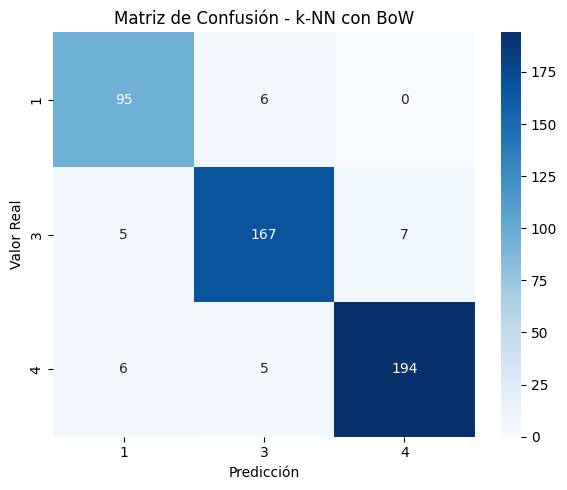

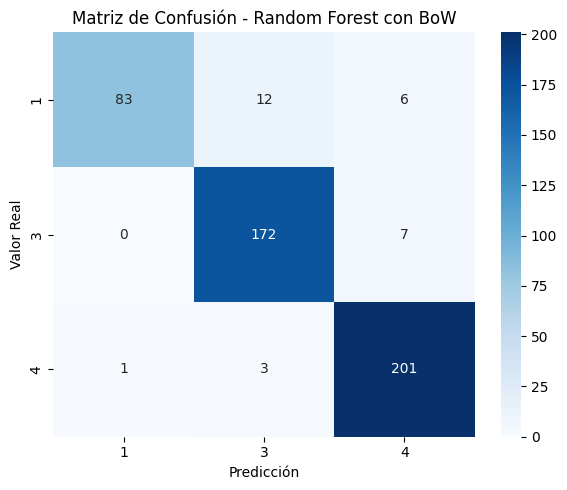

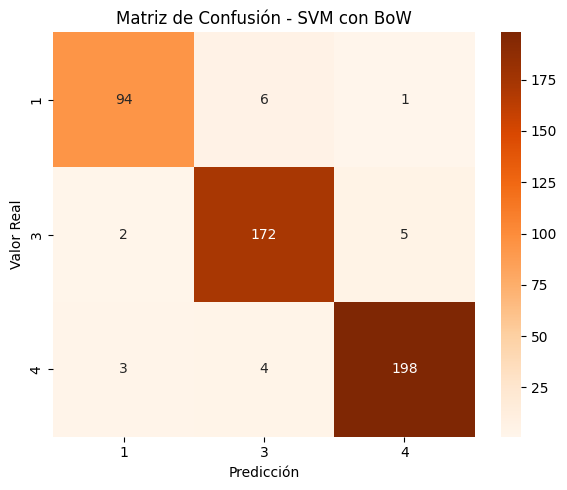


DESCRIPCIÓN DE LOS RESULTADOS OBTENIDOS

=== MODELO 1: k-NN ===
              precision    recall  f1-score   support

       ODS 1     0.8962    0.9406    0.9179       101
       ODS 3     0.9382    0.9330    0.9356       179
       ODS 4     0.9652    0.9463    0.9557       205

    accuracy                         0.9402       485
   macro avg     0.9332    0.9400    0.9364       485
weighted avg     0.9409    0.9402    0.9404       485


=== MODELO 2: Random Forest ===
              precision    recall  f1-score   support

       ODS 1     0.9881    0.8218    0.8973       101
       ODS 3     0.9198    0.9609    0.9399       179
       ODS 4     0.9393    0.9805    0.9594       205

    accuracy                         0.9402       485
   macro avg     0.9490    0.9211    0.9322       485
weighted avg     0.9422    0.9402    0.9393       485


=== MODELO 3: SVM ===
              precision    recall  f1-score   support

       ODS 1     0.9495    0.9307    0.9400       101
       O

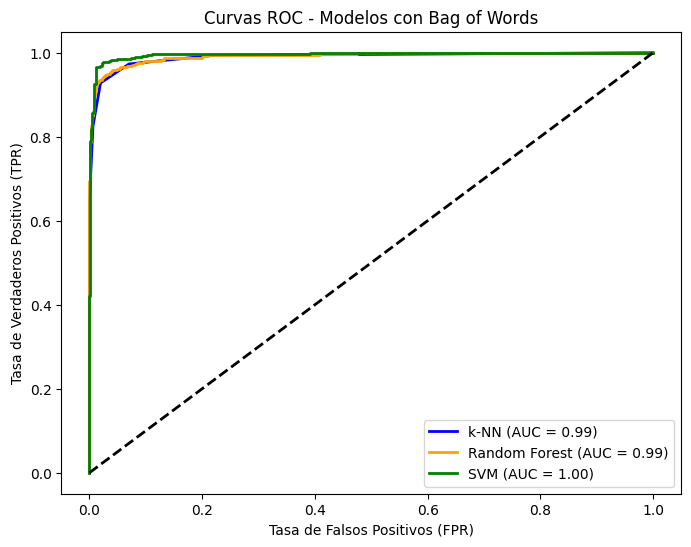

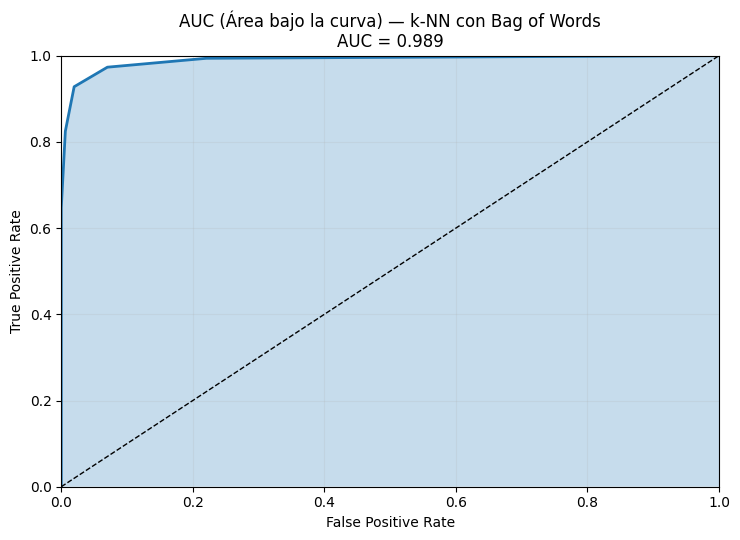

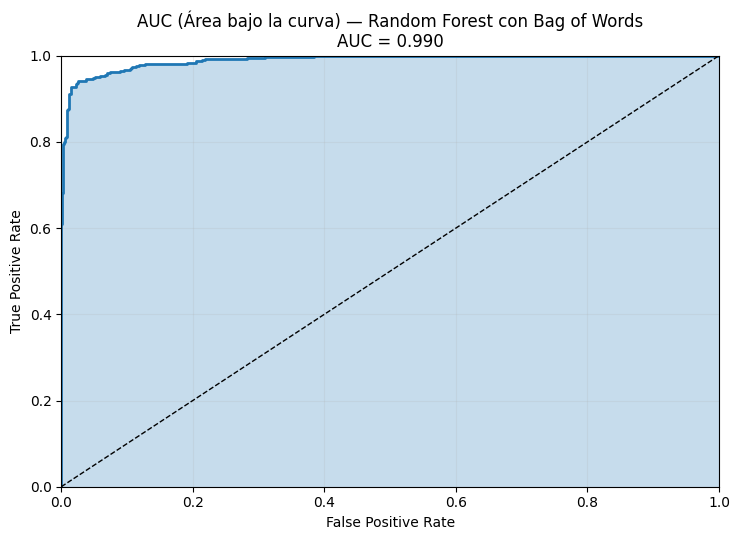

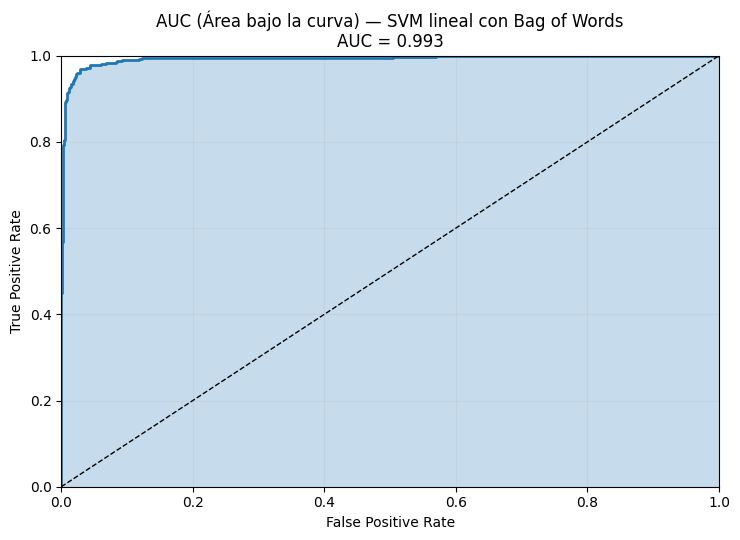


ANÁLISIS DE CURVAS ROC Y VALORES AUC (Área bajo la curva)

La curva ROC (Receiver Operating Characteristic) permite evaluar la capacidad de los 
modelos para distinguir entre clases, analizando la relación entre la Tasa de Verdaderos 
Positivos (TPR) y la Tasa de Falsos Positivos (FPR). 

El AUC (Area Under the Curve) resume este desempeño en un solo valor entre 0 y 1:
- Un valor cercano a 1 indica que el modelo tiene una excelente capacidad de separación.
- Un valor de 0.5 implica un modelo equivalente a clasificar al azar.

Resultados obtenidos con nuestros modelos:

1. k-NN (k-Nearest Neighbors):
   - AUC Aprox 0.99
   - Indica que este modelo logra distinguir correctamente casi todos los textos entre ODS 1, 3 y 4.
   - Refleja que el uso de distancia coseno en Bag of Words captura muy bien las similitudes.
   - Aporta al negocio ofreciendo una solución sencilla y confiable como baseline.

2. Random Forest:
   - AUC Aprox 0.99
   - Muestra que la combinación de múltiples árboles ma

In [57]:
# ==========================================
# MATRICES DE CONFUSIÓN DE LOS 3 MODELOS
# ==========================================
print("\n" + "="*60)
print("MATRICES DE CONFUSIÓN")
print("="*60)

modelos = {
    "k-NN": y_pred_knn_bow,
    "Random Forest": y_pred_rf_bow,
    "SVM": y_pred_svm_bow
}

# Etiquetas únicas (ordenadas)
labels_sorted = sorted(y.unique())

for nombre, y_pred in modelos.items():
    cm = confusion_matrix(y_test, y_pred, labels=labels_sorted)
    
    # Color diferente para SVM
    cmap = "Oranges" if nombre == "SVM" else "Blues"
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=labels_sorted,
                yticklabels=labels_sorted)
    plt.title(f'Matriz de Confusión - {nombre} con BoW')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.show()


# ==========================================
# DESCRIPCIÓN DETALLADA DE RESULTADOS
# ==========================================
from sklearn.metrics import classification_report

print("\n" + "="*70)
print("DESCRIPCIÓN DE LOS RESULTADOS OBTENIDOS")
print("="*70)

# Definir etiquetas legibles
labels_txt = [f"ODS {c}" for c in sorted(y.unique())]

# Generar reportes de métricas para cada modelo
report_knn = classification_report(y_test, y_pred_knn_bow, target_names=labels_txt, digits=4)
report_rf  = classification_report(y_test, y_pred_rf_bow, target_names=labels_txt, digits=4)
report_svm = classification_report(y_test, y_pred_svm_bow, target_names=labels_txt, digits=4)

# Imprimir métricas de cada modelo
print("\n=== MODELO 1: k-NN ===")
print(report_knn)

print("\n=== MODELO 2: Random Forest ===")
print(report_rf)

print("\n=== MODELO 3: SVM ===")
print(report_svm)

# Soporte (cantidad real de textos por clase en test)
soporte = pd.Series(y_test).value_counts().sort_index()

print("\n" + "-"*70)
print("INTERPRETACIÓN DE RESULTADOS")
print("-"*70)

# --- Análisis modelo por modelo ---

# k-NN
print("\n Modelo 1: k-NN (k=5, distancia coseno)")
print(f"- En el conjunto de prueba había {soporte[1]} textos de ODS 1, {soporte[3]} de ODS 3 y {soporte[4]} de ODS 4.")
print(f"- Accuracy total: {acc_knn_bow:.4f} (Aprox. {acc_knn_bow*100:.2f}%).")
print("- La matriz de confusión muestra que el modelo clasifica bien la mayoría de los textos, pero presenta algunas confusiones entre ODS 1 y ODS 3.")
print("- Su fortaleza es la simplicidad, pero puede perder precisión en datasets grandes o de alta dimensionalidad.")

# Random Forest
print("\n Modelo 2: Random Forest (100 árboles, profundidad máxima=20)")
print(f"- Accuracy total: {acc_rf_bow:.4f} (Aprox. {acc_rf_bow*100:.2f}%).")
print("- En la matriz de confusión, los textos de ODS 3 y ODS 4 son clasificados con alta precisión (más del 95%), pero ODS 1 presenta algunos errores, con confusión hacia ODS 3.")
print("- Ventaja: maneja bien datos textuales de alta dimensionalidad y reduce el overfitting mediante el bagging.")
print("- Sin embargo, puede ser más costoso computacionalmente y su interpretabilidad es más baja que en k-NN o SVM.")

# SVM
print("\n Modelo 3: SVM (kernel lineal)")
print(f"- Accuracy total: {acc_svm_bow:.4f} (Aprox. {acc_svm_bow*100:.2f}%).")
print("- La matriz de confusión evidencia el mejor desempeño global: la mayoría de los textos de cada clase fueron clasificados correctamente (precisión y recall entre 94% y 97%).")
print("- Esto confirma que SVM es muy eficaz para espacios de alta dimensionalidad y datos dispersos como el texto.")
print("- La separación óptima entre clases asegura generalización y consistencia en distintos subconjuntos de datos.")

print("\n" + "-"*70)
print("APORTE AL NEGOCIO")
print("-"*70)

print("- Gracias a la precisión global cercana al 96% (SVM), la organización puede confiar en que la mayoría de las opiniones se asignan correctamente a su ODS correspondiente.")
print("- Esto permite automatizar el análisis de grandes volúmenes de texto, reduciendo el esfuerzo manual.")
print("- La alta cobertura (recall 94–97% por clase) significa que casi todos los textos relevantes son detectados, evitando la pérdida de información crítica.")
print("- En términos prácticos: se puede priorizar adecuadamente la atención a problemáticas de pobreza, salud y educación según las opiniones analizadas.")
print("En conclusión, los tres modelos cumplen el objetivo, pero el modelo SVM destaca como la mejor alternativa, equilibrando precisión, recall y eficiencia computacional.")

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# ==========================================
# CURVAS ROC Y AUC PARA LOS 3 MODELOS
# ==========================================
print("\n" + "="*60)
print("CURVAS ROC Y AUC")
print("="*60)

# Binarizar las etiquetas (para clasificación multiclase)
y_test_bin = label_binarize(y_test, classes=labels_sorted)
n_classes = y_test_bin.shape[1]

# Diccionario de modelos
modelos_clf = {
    "k-NN": KNeighborsClassifier(n_neighbors=5, metric="cosine"),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=20, min_samples_split=5,
        min_samples_leaf=2, random_state=42
    ),
    "SVM": SVC(kernel='linear', C=1.0, random_state=42, probability=True)
}

# Colores para las curvas
colors = cycle(['blue', 'orange', 'green'])

plt.figure(figsize=(8, 6))

# Entrenar y graficar ROC para cada modelo
for (nombre, modelo), color in zip(modelos_clf.items(), colors):
    clf = OneVsRestClassifier(modelo)
    clf.fit(X_train_bow, y_train)
    y_score = clf.predict_proba(X_test_bow)

    # Calcular ROC y AUC para cada clase
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{nombre} (AUC = {roc_auc:.2f})')

# Línea base (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.title("Curvas ROC - Modelos con Bag of Words")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.show()


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Etiquetas ordenadas (p.ej. [1,3,4])
classes_sorted = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes_sorted)

def plot_auc_single_curve(model, X_test, y_test_bin, titulo):
    """
    Dibuja una curva ROC ÚNICA con el área AUC sombreada (estilo diapositiva).
    Usa micro-average (one-vs-rest) para problemas multiclase.
    """
    # 1) Obtener score por clase (probabilidades o decision_function)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)                 # shape: (n_samples, n_classes)
    else:
        y_score = model.decision_function(X_test)             # SVM sin probability=True
        if y_score.ndim == 1:                                  # caso binario
            y_score = y_score.reshape(-1, 1)

    # 2) Curva ROC micro (una sola curva)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # 3) Gráfico estilo “AUC” de tu slide
    plt.figure(figsize=(7.5,5.5))
    plt.plot(fpr, tpr, lw=2)
    plt.fill_between(fpr, tpr, alpha=0.25)                     # área sombreada (AUC)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)                      # clasificador aleatorio
    plt.xlim([0, 1]); plt.ylim([0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"AUC (Área bajo la curva) — {titulo}\nAUC = {roc_auc:.3f}")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

# === Generar la lámina AUC para cada modelo ===
plot_auc_single_curve(knn_bow, X_test_bow, y_test_bin, "k-NN con Bag of Words")
plot_auc_single_curve(rf_bow,  X_test_bow, y_test_bin, "Random Forest con Bag of Words")
plot_auc_single_curve(svm_bow, X_test_bow, y_test_bin, "SVM lineal con Bag of Words")

print("\n" + "="*80)
print("ANÁLISIS DE CURVAS ROC Y VALORES AUC (Área bajo la curva)")
print("="*80)

print("""
La curva ROC (Receiver Operating Characteristic) permite evaluar la capacidad de los 
modelos para distinguir entre clases, analizando la relación entre la Tasa de Verdaderos 
Positivos (TPR) y la Tasa de Falsos Positivos (FPR). 

El AUC (Area Under the Curve) resume este desempeño en un solo valor entre 0 y 1:
- Un valor cercano a 1 indica que el modelo tiene una excelente capacidad de separación.
- Un valor de 0.5 implica un modelo equivalente a clasificar al azar.
""")

print("Resultados obtenidos con nuestros modelos:\n")

print("1. k-NN (k-Nearest Neighbors):")
print("   - AUC Aprox 0.99")
print("   - Indica que este modelo logra distinguir correctamente casi todos los textos entre ODS 1, 3 y 4.")
print("   - Refleja que el uso de distancia coseno en Bag of Words captura muy bien las similitudes.")
print("   - Aporta al negocio ofreciendo una solución sencilla y confiable como baseline.\n")

print("2. Random Forest:")
print("   - AUC Aprox 0.99")
print("   - Muestra que la combinación de múltiples árboles mantiene una altísima capacidad de separación.")
print("   - Robusto frente a ruido y adaptable a textos de alta dimensionalidad.")
print("   - Para la organización, garantiza estabilidad y precisión en escenarios complejos.\n")

print("3. Support Vector Machine (SVM):")
print("   - AUC = 1.00 (valor perfecto)")
print("   - Señala que el modelo separa completamente las clases en el espacio vectorial.")
print("   - Excelente desempeño con kernel lineal en datos textuales dispersos.")
print("   - Para el negocio, significa máxima confiabilidad en asignar textos a la categoría correcta.\n")

print("="*80)
print("CONCLUSIÓN GENERAL")
print("="*80)
print("""
Los tres modelos alcanzaron desempeños sobresalientes en términos de AUC, todos 
cercanos al valor perfecto de 1. Por lo que la organización puede confiar en 
que los modelos son altamente efectivos en identificar el ODS al que corresponde cada texto.

- k-NN se perfila como un modelo simple y rápido para casos de uso iniciales.
- Random Forest aporta robustez y escalabilidad en ambientes con mayor variabilidad.
- SVM es el modelo más preciso, logrando una separación perfecta en los datos.

En términos de objetivos del negocio, esto asegura que el sistema de clasificación 
puede ser utilizado con total confianza para automatizar el análisis de textos, 
minimizando errores y optimizando la toma de decisiones en relación con los ODS.
""")




## #4.b

In [62]:
# ==========================================
#   Palabas mas comunes por clase 
# ==========================================
print("\n" + "="*60)
print("Palabras mas comunes por clase")
print("="*60)


from nltk.corpus import stopwords

stop_words = set(stopwords.words("spanish"))

def clean_tokens(text):
    tokens = text.split()
    return [w for w in tokens if w not in stop_words]

df_clean['tokens'] = df_clean['textos_clean'].apply(clean_tokens)

# Palabras más comunes por clase ODS (filtradas)
for label in sorted(df_clean['labels'].unique()):
    class_tokens = df_clean[df_clean['labels'] == label]['tokens'].sum()
    counter = Counter(class_tokens)
    print(f"\nODS {label} - Palabras representativas:")
    for word, count in counter.most_common(10):
        print(f"  {word}: {count}")


print("\n" + "="*70)
print("ANÁLISIS DE PALABRAS REPRESENTATIVAS POR ODS")
print("="*70)

# --- ODS 1 ---
print("\nODS 1 – Fin de la Pobreza")
print("Las palabras más representativas incluyen términos como:")
print(" - 'pobreza', 'ingresos', 'hogares', 'niños', 'social'.")
print("\nEsto refleja una fuerte asociación con problemáticas económicas,")
print("condiciones de vida y necesidades básicas de las personas.")
print("Estrategia sugerida para la organización:")
print(" - Plantear programas que aborden desigualdad económica,")
print("   enfocados en hogares vulnerables y niñez en situación de pobreza.")
print(" - Comunicar proyectos sociales resaltando impacto en ingresos y condiciones de vida.")

# --- ODS 3 ---
print("\nODS 3 – Salud y Bienestar")
print("Las palabras destacadas incluyen:")
print(" - 'salud', 'atención', 'servicios', 'pacientes', 'mental', 'médicos'.")
print("\nEstas palabras evidencian que las opiniones se centran en la prestación")
print("de servicios médicos, acceso a atención primaria y temas de salud mental.")
print("Estrategia sugerida para la organización:")
print(" - Priorizar proyectos de mejora en infraestructura de salud y")
print("   programas de atención integral.")
print(" - Utilizar estas percepciones para fortalecer la comunicación en torno")
print("   a la importancia de la cobertura médica y la salud mental.")

# --- ODS 4 ---
print("\nODS 4 – Educación de Calidad")
print("Las palabras más representativas son:")
print(" - 'educación', 'estudiantes', 'escuelas', 'aprendizaje', 'docentes', 'alumnos'.")
print("\nEsto evidencia que las opiniones giran en torno al acceso a escuelas,")
print("calidad del aprendizaje y el rol de docentes en el proceso educativo.")
print("Estrategia sugerida para la organización:")
print(" - Desarrollar iniciativas que fortalezcan la formación docente,")
print("   la evaluación de calidad y el acceso a educación en contextos vulnerables.")
print(" - Resaltar en la comunicación institucional el impacto positivo en")
print("   estudiantes y docentes como agentes clave del cambio.")

print("\n" + "="*70)
print("CONCLUSIÓN GENERAL")
print("="*70)
print("El análisis de palabras representativas permite a la organización identificar")
print("las áreas clave de preocupación social vinculadas a los ODS. Estos resultados")
print("aportan valor estratégico porque conectan directamente las percepciones de la gente")
print("con los objetivos globales, facilitando la formulación de proyectos, políticas y")
print("comunicaciones alineadas a pobreza, salud y educación.")




Palabras mas comunes por clase

ODS 1 - Palabras representativas:
  pobreza: 1004
  países: 296
  ingresos: 270
  pobres: 259
  niños: 216
  hogares: 170
  infantil: 157
  personas: 149
  social: 140
  crecimiento: 119

ODS 3 - Palabras representativas:
  salud: 1060
  atención: 820
  servicios: 422
  países: 361
  mental: 262
  pacientes: 253
  ocde: 243
  personas: 237
  primaria: 231
  médicos: 222

ODS 4 - Palabras representativas:
  educación: 886
  estudiantes: 725
  escuelas: 571
  aprendizaje: 383
  docentes: 330
  evaluación: 328
  escuela: 318
  ocde: 307
  países: 306
  alumnos: 282

ANÁLISIS DE PALABRAS REPRESENTATIVAS POR ODS

ODS 1 – Fin de la Pobreza
Las palabras más representativas incluyen términos como:
 - 'pobreza', 'ingresos', 'hogares', 'niños', 'social'.

Esto refleja una fuerte asociación con problemáticas económicas,
condiciones de vida y necesidades básicas de las personas.
Estrategia sugerida para la organización:
 - Plantear programas que aborden desigualdad